# Stock Data, Machine Learning, and Neural Networks

In [1]:
import pandas as pd 
import numpy as np

In [12]:
#Import the cleaned dataset from our Stock_api notebook and using the date as the index
data = pd.read_csv('C:/Users/linwi/Documents/Stock_test/Cleaned_Dataset/GOOG.csv',index_col = 0)

In [13]:
#Check
data.head()

,open,high,low,close,adjusted close,volume
2024-04-01,151.650,156.990,151.65,156.50,156.50,24413368
2024-03-28,152.000,152.670,151.33,152.26,152.26,21105628
2024-03-27,152.145,152.690,150.13,151.94,151.94,16621964
2024-03-26,151.240,153.200,151.03,151.70,151.70,19312694
2024-03-25,150.950,151.456,148.80,151.15,151.15,15114728


In [14]:
#Check the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8+ KB


In [16]:
#Changng the datatype of the index to date time.
data.index = pd.to_datetime(data.index)

In [17]:
#check 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2024-04-01 to 2014-03-27
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            2520 non-null   float64
 1   high            2520 non-null   float64
 2   low             2520 non-null   float64
 3   close           2520 non-null   float64
 4   adjusted close  2520 non-null   float64
 5   volume          2520 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.8 KB


## Modeling,Visualizations, and Evaluations

### Preprocessing and Feature Engineering

Our target will be whether the stock will go up or down. We will be creating new columns to help with the modeling.

In [36]:
#Create a new column for called tomorrow. This gives us the adjusted close price for the next day.
data['Tomorrow_Adj_close'] = data["adjusted close"].shift(1)

In [37]:
#Check
data

,open,high,low,close,adjusted close,volume,Tomorrow_Adj_close
2024-04-01,151.650,156.990,151.65,156.50,156.5000,24413368,NaN
2024-03-28,152.000,152.670,151.33,152.26,152.2600,21105628,156.5000
2024-03-27,152.145,152.690,150.13,151.94,151.9400,16621964,152.2600
2024-03-26,151.240,153.200,151.03,151.70,151.7000,19312694,151.9400
2024-03-25,150.950,151.456,148.80,151.15,151.1500,15114728,151.7000
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,567.00,28.3500,146700,28.4870
2014-04-01,558.710,568.450,558.71,567.16,28.3580,7900,28.3500
2014-03-31,566.890,567.000,556.93,556.97,27.8485,10800,28.3580
2014-03-28,561.200,566.430,558.67,559.99,27.9995,41100,27.8485


We will be getting rid of the `close` column as it doesn't adjust for stock splits.

In [47]:
del data['close']

Create another column called `Target` to see if `Tomorrow_Adj_close` price is greater than present day's `Close` price.

In [48]:
#Create a new column called Target of 1(True) and 0(False) to see if tomorrow's adjusted close price is greater than today's close price.
data["Target"] = (data['Tomorrow_Adj_close'] > data["adjusted close"]).astype(int)

In [49]:
data

,open,high,low,adjusted close,volume,Tomorrow_Adj_close,Target
2024-04-01,151.650,156.990,151.65,156.5000,24413368,NaN,0
2024-03-28,152.000,152.670,151.33,152.2600,21105628,156.5000,1
2024-03-27,152.145,152.690,150.13,151.9400,16621964,152.2600,1
2024-03-26,151.240,153.200,151.03,151.7000,19312694,151.9400,1
2024-03-25,150.950,151.456,148.80,151.1500,15114728,151.7000,1
...,...,...,...,...,...,...,...
2014-04-02,565.106,604.830,562.19,28.3500,146700,28.4870,1
2014-04-01,558.710,568.450,558.71,28.3580,7900,28.3500,0
2014-03-31,566.890,567.000,556.93,27.8485,10800,28.3580,1
2014-03-28,561.200,566.430,558.67,27.9995,41100,27.8485,0


Now that we have set up our data and did some feature engineering, we will start with modeling.

### Modeling

In [50]:
#Importing the Linear Regression Model
from sklearn.linear_model import LinearRegression #Importing the baseline linear regression model

We will be using the linear regression model as our baseline model to predict the `Tomorrow_Adj_Close` price.

In [64]:
model = LinearRegression()

#### Splitting the Data

In [109]:
train = data.iloc[100:]
test = data.iloc[1:100] #Excluding the first record because it has a nan value for the `Tomorrow_Adj_Close` column

predictors = ["adjusted close", "open","high","volume","low"]

The predictors are the columns that we will be using to predict the future price and target direction of the stock. Thus, we are excluding `target` and `Tomorrow_adj_close` since it has data of the future records.

#### Linear Regression

In [110]:
regression_results = model.fit(train[predictors],train["Tomorrow_Adj_close"])

In [111]:
from sklearn.metrics import r2_score, mean_squared_error
#Getting the predictions of the model
predictions = model.predict(test[predictors])

In [112]:
#Turning the predictions into a series for easier readability
predictions = pd.Series(predictions, index = test.index)

In [113]:
#Getting the r2 score for the 
linear_r2 = r2_score(test['Tomorrow_Adj_close'], predictions)
linear_mse = mean_squared_error(test['Tomorrow_Adj_close'],predictions)
print(f"The r2 score is {linear_r2} and the mean squared error is {linear_mse}.")

The r2 score is 0.8578460297490549 and the mean squared error is 5.481171325830812.


We have a r2 score of 0.86 which looks pretty good (R2 score of 1 is the best) and a mean squared error of 5.48. We have to investigate more by using a visualization to see the difference between the actual values and predictions values.

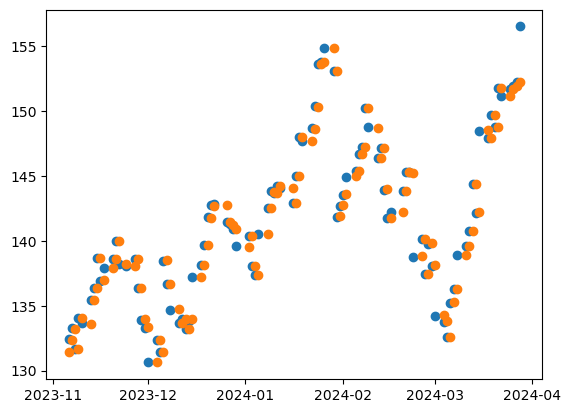

In [114]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x = test.index,y = test['Tomorrow_Adj_close'])
plt.scatter(x=test.index, y = predictions)
plt.show()

#### Random Forests

With random forests, we will try to predict whether the stock went up. (`Target` column equals 1)

In [115]:
from sklearn.ensemble import RandomForestClassifier
#Instantiating the model
forest_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [116]:
forest_model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [122]:
from sklearn.metrics import precision_score
#Getting the predictions from the forest model
forest_predictions = forest_model.predict(test[predictors])

In [123]:
#Turning the predictions into a series with the date index for easier interpretation
forest_predictions = pd.Series(forest_predictions,index = test.index)

In [121]:

precision_score(test["Target"],forest_predictions)

0.5757575757575758